In [2]:
# importing importnant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Cleaning and Preparation
- Load the dataset and handle any missing or incorrect values.
- Convert the 'Date' column to a datetime type and ensure all pollutant level columns are numeric.

In [3]:
df = pd.read_csv('aqidataset.csv')

Basic Information of the Data "aqidataset".

In [4]:
df.head()

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,0,01/01/2023,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,1,01/02/2023,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2,2,01/03/2023,21,Ozone,Connecticut Hill,36-109-9991,AQS,21,.,NaN,NaN,NaN,Good,Ithaca,NY
3,3,01/04/2023,25,Ozone,Connecticut Hill,36-109-9991,AQS,25,.,NaN,NaN,NaN,Good,Ithaca,NY
4,4,01/05/2023,31,Ozone,Connecticut Hill,36-109-9991,AQS,31,.,NaN,NaN,NaN,Good,Ithaca,NY


In [5]:
df.describe()

,Unnamed: 0,Overall AQI Value
count,10924.000000,10924.000000
mean,5461.500000,53.218876
std,3153.631505,27.553514
min,0.000000,0.000000
25%,2730.750000,38.000000
50%,5461.500000,47.000000
75%,8192.250000,61.000000
max,10923.000000,688.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  10924 non-null  int64 
 1   Date                        10924 non-null  object
 2   Overall AQI Value           10924 non-null  int64 
 3   Main Pollutant              10924 non-null  object
 4   Site Name (of Overall AQI)  10790 non-null  object
 5   Site ID (of Overall AQI)    10924 non-null  object
 6   Source (of Overall AQI)     10924 non-null  object
 7   Ozone                       10575 non-null  object
 8   PM25                        10924 non-null  object
 9   CO                          8395 non-null   object
 10  PM10                        9853 non-null   object
 11  NO2                         8760 non-null   object
 12  AQI category                10924 non-null  object
 13  city                        10924 non-null  ob

- Handle missing values by checking if there are any in the dataset

In [7]:
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
Date,0
Overall AQI Value,0
Main Pollutant,0
Site Name (of Overall AQI),134
Site ID (of Overall AQI),0
Source (of Overall AQI),0
Ozone,349
PM25,0
CO,2529


In [8]:
# Dropping the Unnamed Column
df.drop(columns=['Unnamed: 0'], inplace=True)

- Imputing the missing values in Site Name(of Overall AQI) by suitable value.

In [9]:
df['Site Name (of Overall AQI)'].fillna(df['Site Name (of Overall AQI)'].mode(), inplace=True)

- Converting 'Date' column to datetime format

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

- Ensuring all pollutant level columns are numeric
- Also Handling the missing values

In [11]:
df['Ozone'] = pd.to_numeric(df['Ozone'], errors='coerce')

In [12]:
df['Ozone'].fillna(df['Ozone'].median(), inplace=True)

In [13]:
df['PM25'] = pd.to_numeric(df['PM25'], errors='coerce')

In [14]:
df['PM25'].fillna(df['PM25'].median(), inplace=True)

In [15]:
df['CO'] = pd.to_numeric(df['CO'], errors='coerce')

In [16]:
df['CO'].fillna(df['CO'].median(),inplace=True)

In [17]:
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')

In [18]:
df['PM10'].fillna(df['PM10'].median(),inplace=True)

In [19]:
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')

In [20]:
df['NO2'].fillna(df['NO2'].median(),inplace=True)

In [21]:
# Rechecking the INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        10924 non-null  datetime64[ns]
 1   Overall AQI Value           10924 non-null  int64         
 2   Main Pollutant              10924 non-null  object        
 3   Site Name (of Overall AQI)  10790 non-null  object        
 4   Site ID (of Overall AQI)    10924 non-null  object        
 5   Source (of Overall AQI)     10924 non-null  object        
 6   Ozone                       10924 non-null  float64       
 7   PM25                        10924 non-null  float64       
 8   CO                          10924 non-null  float64       
 9   PM10                        10924 non-null  float64       
 10  NO2                         10924 non-null  float64       
 11  AQI category                10924 non-null  object    

CONCLUSION :
- By handling the Columns Which can be converted to other suitable datatypes I was able to bring the memory usage a little bit lower from 1.3+ MB to 1.2+ MB.

2. Descriptive Statistics
- Provide summary statistics for the numeric columns, especially the pollutant levels and AQI values.
- Identify the date with the highest recorded AQI value.

In [22]:
df.describe()

,Date,Overall AQI Value,Ozone,PM25,CO,PM10,NO2
count,10924,10924.000000,10924.000000,10924.000000,10924.000000,10924.000000,10924.000000
mean,2023-07-01 22:11:30.735994112,53.218876,46.716404,42.743043,6.730959,21.782955,26.164226
min,2023-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-02 00:00:00,38.000000,34.000000,28.000000,5.000000,14.000000,20.000000
50%,2023-07-02 00:00:00,47.000000,41.000000,40.000000,6.000000,18.000000,25.000000
75%,2023-10-01 00:00:00,61.000000,48.000000,54.000000,8.000000,23.000000,32.000000
max,2023-12-31 00:00:00,688.000000,210.000000,290.000000,76.000000,688.000000,104.000000
std,NaN,27.553514,23.674409,21.657348,3.605491,16.873094,10.880807


In [23]:
date_with_highest_AQI = df.loc[df['Overall AQI Value'].idxmax(), ['Date']]
print(date_with_highest_AQI)

Date    2023-07-26 00:00:00
Name: 7863, dtype: object


CONCLUSION :
- Summary Statistics Shows that the data is for year 2023 only from Jan 1st to Dec 31st.
- PM10 can said to be the most hazardous Pollutant.
- On Date 26/07/2023 there is highest recorded AQI value of 688.

3. Distribution Analysis
- Create histograms to visualize the distributions of AQI values and key pollutants like PM2.5 and Ozone.

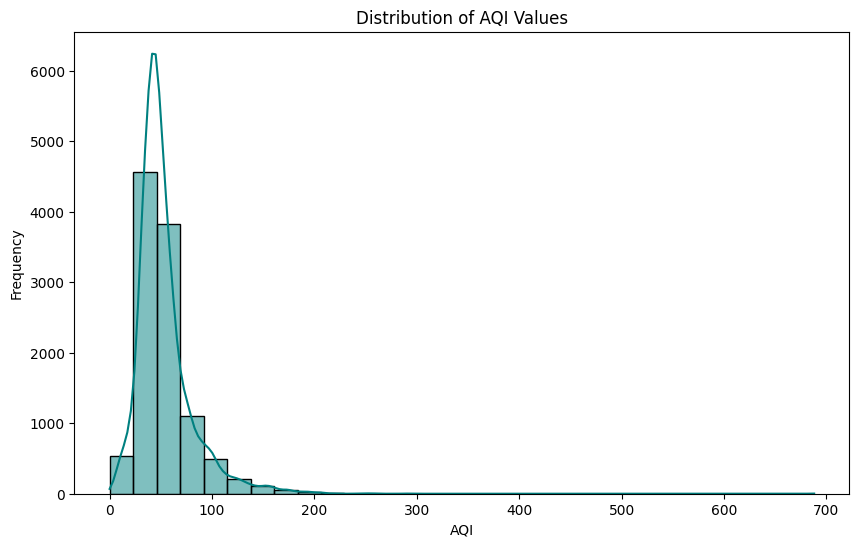

In [24]:
# Histogram for AQI values
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall AQI Value'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

CONCLUSION :
- Slightly Right Skewed means majority of the data points lie on the left side.
- But there are some data points responsible for the skewness of the histogram plot and they lie on the right side which can be generally treated as outliers and can be removed.

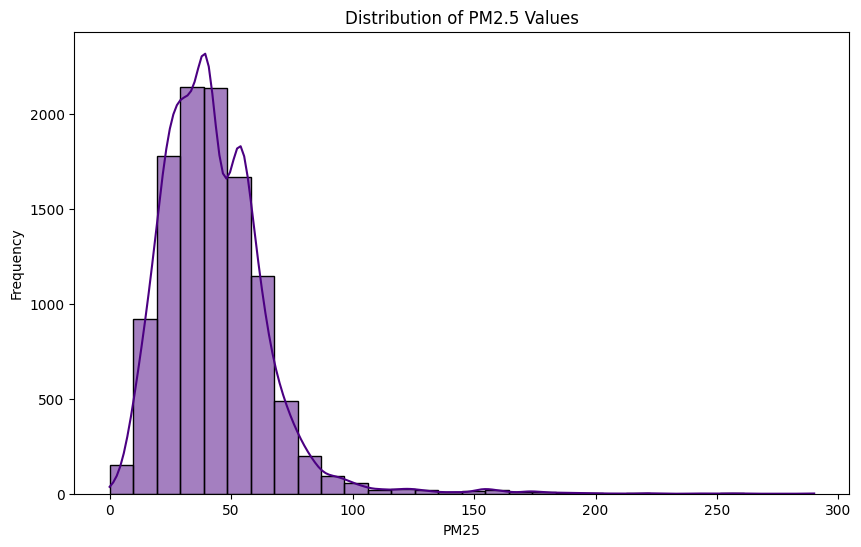

In [25]:
# Histogram for PM25 values
plt.figure(figsize=(10, 6))
sns.histplot(df['PM25'], bins=30, kde=True, color='indigo', edgecolor='black')
plt.title('Distribution of PM2.5 Values')
plt.xlabel('PM25')
plt.ylabel('Frequency')
plt.show()

CONCLUSION :
- Almost perfectly Normal means majority of the data points lie on the middle portion.
- But there are some data points which lie on the right side which is causing a slight skewness but it's in a range that can be ignored.

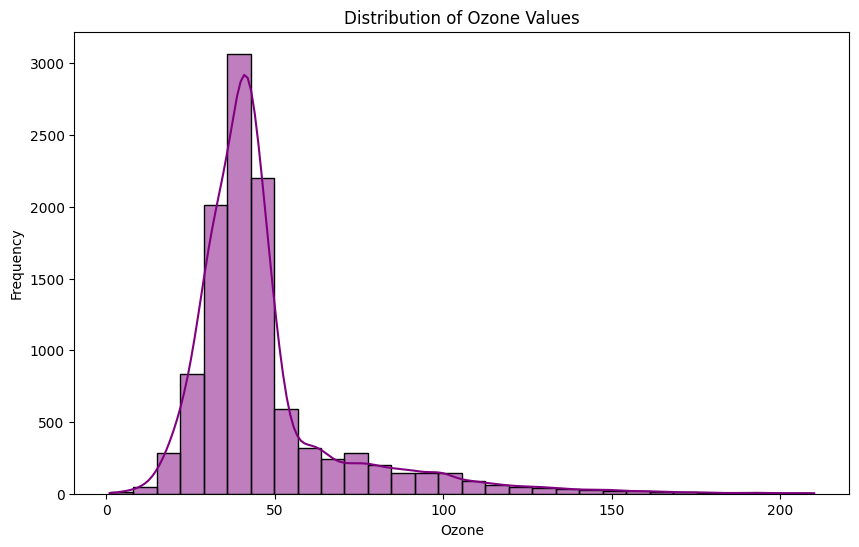

In [26]:
# Histogram for Ozone values
plt.figure(figsize=(10, 6))
sns.histplot(df['Ozone'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Ozone Values')
plt.xlabel('Ozone')
plt.ylabel('Frequency')
plt.show()

CONCLUSION :
- Right Skewed means majority of the data points lie on the left side.
- But there are some data points responsible for the skewness of the histogram plot and they lie on the right side which can be generally treated as outliers.

4. Categorical Data Analysis
- Analyze the frequency of different AQI categories across the dataset.
- Count and visualize the number of measurements by state.

In [27]:
# Count the frequency of each AQI category
aqi_category_counts = df['AQI category'].value_counts()
aqi_category_counts

,count
AQI category,
Good,6322
Moderate,3956
Unhealthy for Sensitive Groups,502
Unhealthy,129
Very Unhealthy,14
Hazardous,1


<ipython-input-28-45105ec708a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_category_counts.index, y=aqi_category_counts.values, palette='Accent', edgecolor='black')


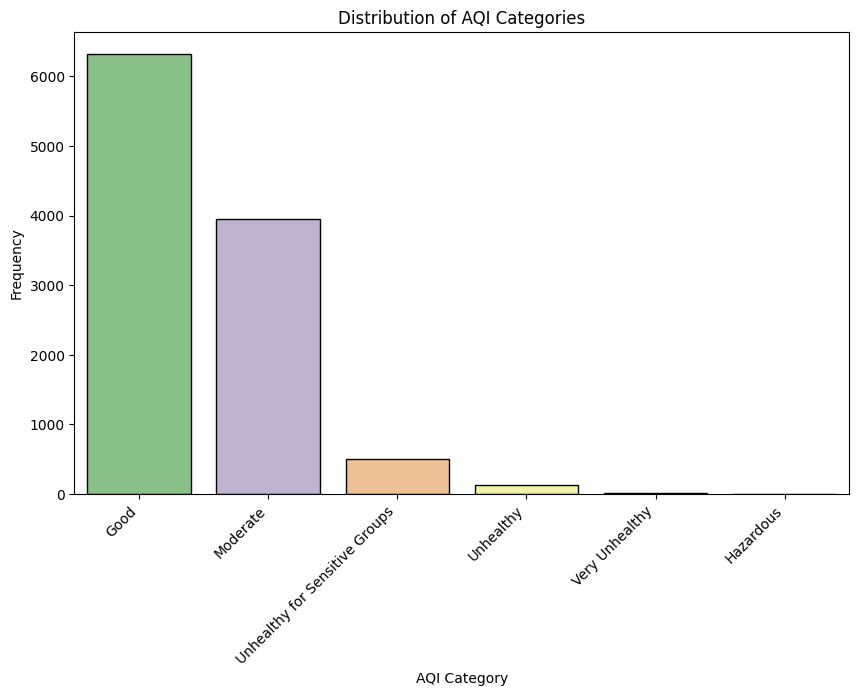

In [28]:
# Plotting the distribution of AQI categories
plt.figure(figsize=(10, 6))
sns.barplot(x=aqi_category_counts.index, y=aqi_category_counts.values, palette='Accent', edgecolor='black')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

CONCLUSION :
- AQI Category of GOOD is heavily dominating.
- This serves to prove that the Air Quality is good mostly and survivable.
- The contribution of AQI Category of dangerous types is not much but it can differ reagion to region.

In [29]:
# Count the number of measurements by state
state_counts = df['state'].value_counts()
state_counts

,count
state,
NC,1823
FL,730
TX,730
PA,730
CA,730
NY,722
DC,365
WI,365
AZ,365


<ipython-input-30-28ad9175f0cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='BrBG', edgecolor='black')


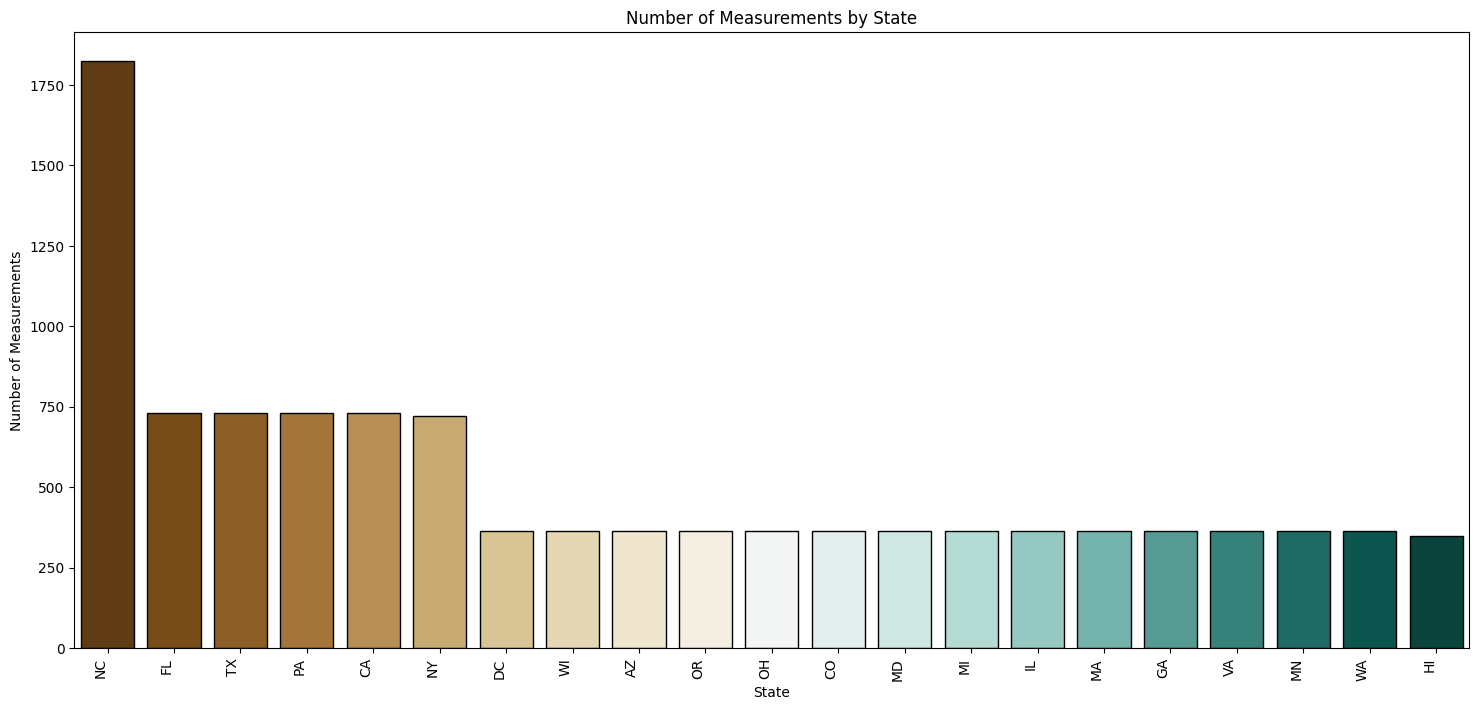

In [30]:
# Plotting the number of measurements by state
plt.figure(figsize=(18, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='BrBG', edgecolor='black')
plt.title('Number of Measurements by State')
plt.xlabel('State')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90, ha='right')
plt.show()


CONCLUSION :
- There's a big difference in how many measurements were taken in each state.
- NC and FL had the most measurements.
- Many states like HI, MN, and WA didn't have as many measurements.

5. Time Series Analysis
- Plot the monthly average AQI to see seasonal trends in air quality.
- Determine if certain times of the year consistently show higher pollutant levels.

In [31]:
# making a copy
df1 = df.copy()

In [32]:
# Set the 'Date' column as the index
df1.set_index('Date', inplace=True)

In [33]:
# Resample the data to monthly frequency and calculate the mean AQI
monthly_avg_aqi = df1['Overall AQI Value'].resample('M').mean()

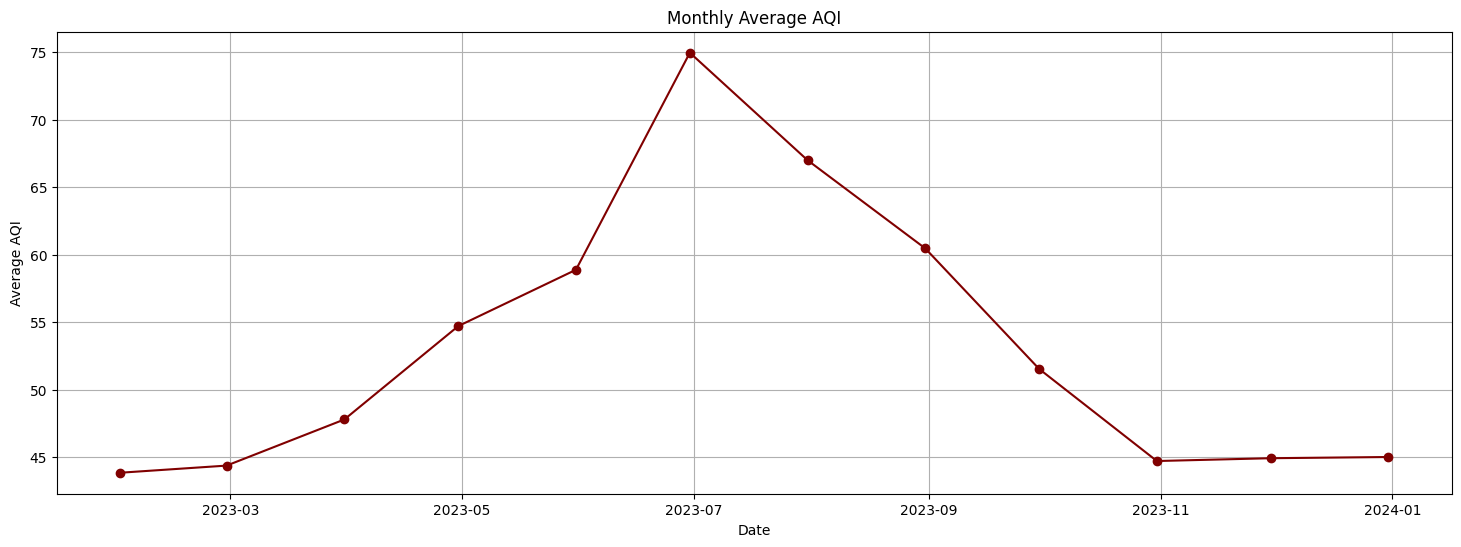

In [35]:
# Plot the monthly average AQI
plt.figure(figsize=(18, 6))
plt.plot(monthly_avg_aqi, marker='o', color='maroon')
plt.title('Monthly Average AQI')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()


CONCLUSION :
- In Month Of July the average AQI value is at it's highest.
- Means July is the most Dangerous month of the year.

6. Correlation Analysis
- Analyze the relationship between different pollutants. Which ones tend to rise together?
- Explore the correlation between AQI values and various pollutants.

In [46]:
# Selecting key pollutants
pollutant_columns = ['Ozone', 'PM25', 'CO', 'PM10', 'NO2']

In [47]:
# Calculate the correlation matrix
correlation_matrix = df1[pollutant_columns].corr()

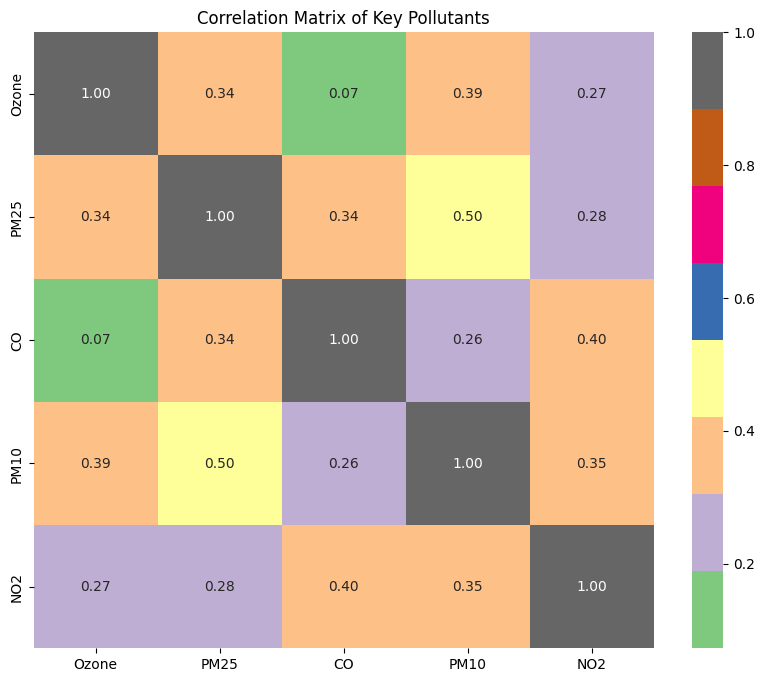

In [48]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Accent', fmt='.2f')
plt.title('Correlation Matrix of Key Pollutants')
plt.show()

CONCLUSION :
- PM25 and PM10 are moderately correlated, suggesting they often occur together.
- Ozone doesn't have strong relationships with the other pollutants.
- PM25 and NO2 are somewhat correlated.
- PM25, PM10, and CO show moderate correlations, indicating they are often found together.

In [49]:
# Adding AQI to the list of columns
columns_with_aqi = pollutant_columns + ['Overall AQI Value']

In [50]:
# Calculate the correlation matrix including AQI
correlation_matrix_with_aqi = df1[columns_with_aqi].corr()

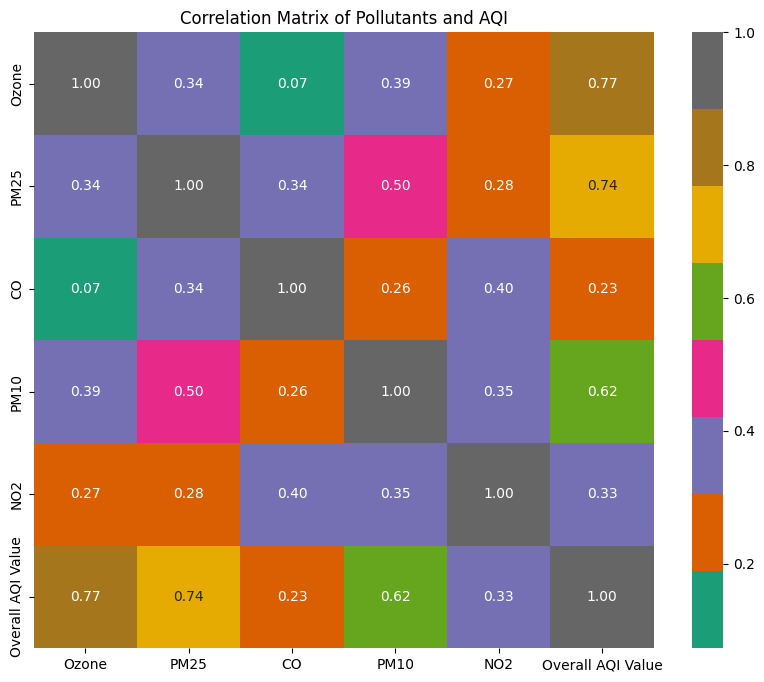

In [51]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_aqi, annot=True, cmap='Dark2', fmt='.2f')
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()

CONCLUSION :
- PM25 and PM10 are the main factors affecting overall air quality.
- Ozone also contributes to air quality, heavily.
- NO2 and CO have a smaller impact on overall air quality.
- Reducing PM25, PM10, and ozone levels is crucial for improving air quality.

7. Grouped Data Analysis
- Compare the average levels of key pollutants across different AQI categories.
- Analyze the average AQI values by city and state to identify areas with the worst air quality.

In [52]:
# Grouping by AQI Category and calculating the mean of pollutants
avg_pollutants_by_aqi_category = df1.groupby('AQI category')[pollutant_columns].mean()
avg_pollutants_by_aqi_category

,Ozone,PM25,CO,PM10,NO2
AQI category,,,,,
Good,37.292787,30.854476,5.827428,15.162765,22.931825
Hazardous,108.000000,145.000000,6.000000,688.000000,42.000000
Moderate,51.445905,55.479272,7.945147,28.140546,29.930485
Unhealthy,127.906977,110.403101,8.813953,50.170543,33.720930
Unhealthy for Sensitive Groups,104.296813,71.171315,7.910359,44.356574,34.898406
Very Unhealthy,148.571429,162.285714,10.214286,96.214286,37.642857


CONCLUSION :
- The average of Good AQI Category is comparably less from other Categories this is a negative sign for environmental health.
- In Hazardous Category Value of 688 is maximum and the Pollutant responsible for this is PM10.

In [59]:
# Grouping by City and calculating the average AQI
avg_aqi_by_city = df1.groupby('city')['Overall AQI Value'].mean().sort_values(ascending=False)
avg_aqi_by_city

CONCLUSION :

1. Asheville -         43.405479
2. Chapel Hill -     41.000000
3. Ithaca       -    36.983193
4. Kahului       -   16.492837
- These cities have least AQI average values means they lie in the Very Unhealthy or even Hazardous Region.

In [62]:
# Grouping by State and calculating the average AQI
avg_aqi_by_state = df1.groupby('state')['Overall AQI Value'].mean().sort_values(ascending=False)
avg_aqi_by_state

,Overall AQI Value
state,
AZ,84.084932
TX,69.075342
CO,67.739726
CA,65.379452
IL,63.616438
MI,61.432877
MN,57.186301
OH,57.117808
GA,56.969863


CONCLUSION :
1.  VA -   45.926027
2.  MA -  45.906849
3.  NC -   45.452002
4.  OR -   45.249315
5.  HI -   16.492837
- These states have least AQI average values means they lie in the Very Unhealthy or even Hazardous Region.

8. Text Data Analysis
- Extract the most frequently mentioned main pollutants in days categorized as 'unhealthy'.

In [64]:
# Filter the data for 'Unhealthy' AQI category
unhealthy_days = df1[df1['AQI category'] == 'Unhealthy']
unhealthy_days

,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
Date,,,,,,,,,,,,,
2023-06-02,154,Ozone,LARSEN JUNIOR HIGH,17-089-0005,AQS,154.0,114.0,7.0,46.0,37.0,Unhealthy,Chicago,IL
2023-06-10,151,Ozone,NORTHBROOK WATER PLANT,17-031-4201,AQS,151.0,64.0,8.0,49.0,42.0,Unhealthy,Chicago,IL
2023-06-24,151,Ozone,MORTON ARBORETUM,17-043-6001,AQS,151.0,76.0,7.0,54.0,45.0,Unhealthy,Chicago,IL
2023-06-29,163,PM2.5,CARY GROVE HS,17-111-0001,AQS,147.0,163.0,11.0,67.0,40.0,Unhealthy,Chicago,IL
2023-07-16,153,PM2.5,COM ED TRAINING CENTER,17-197-1011,AQS,64.0,153.0,7.0,52.0,26.0,Unhealthy,Chicago,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,159,Ozone,Northwest Harris County,48-201-0029,AQS,159.0,62.0,10.0,20.0,47.0,Unhealthy,Houston,TX
2023-09-26,151,Ozone,Galveston 99th Street,48-167-1034,AQS,151.0,44.0,8.0,16.0,35.0,Unhealthy,Houston,TX
2023-07-04,163,PM2.5,TACOMA - L STREET,53-053-0029,AQS,48.0,163.0,6.0,18.0,34.0,Unhealthy,Seattle,WA


In [68]:
unhealthy_days['Main Pollutant'].value_counts().sort_values(ascending=False)

,count
Main Pollutant,
Ozone,70
PM2.5,55
PM10,4


CONCLUSION :
- There Are total 129 Unhealthy Days In Year 2023.
- The Main Pollutants Responsible for this are Ozone and PM25.

9. Multivariate Analysis
- Create scatter plots to investigate the relationships between Ozone levels and temperature with AQI values.

<ipython-input-77-4071a1f8ffab>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Ozone', y='Overall AQI Value', data=df1, palette='PiYG', edgecolor='black')


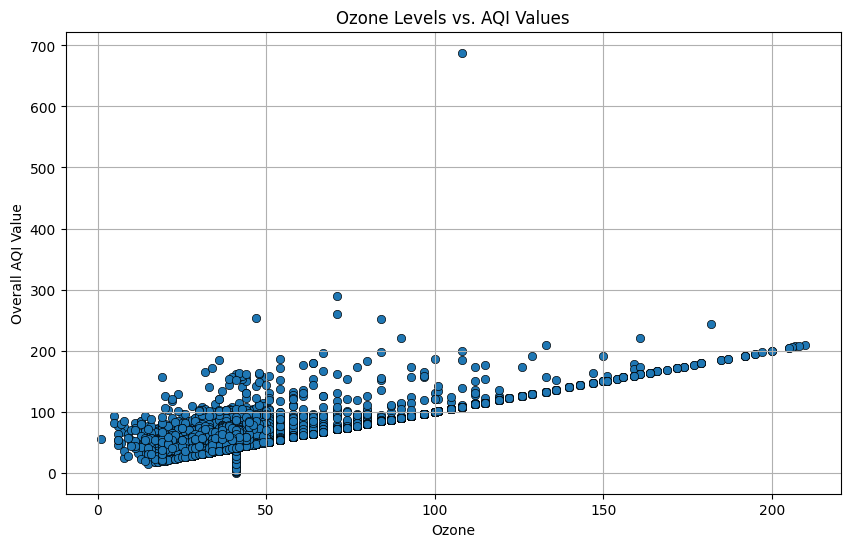

In [77]:
# Scatter plot for Ozone vs. AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ozone', y='Overall AQI Value', data=df1, palette='PiYG', edgecolor='black')
plt.title('Ozone Levels vs. AQI Values')
plt.xlabel('Ozone')
plt.ylabel('Overall AQI Value')
plt.grid(True)
plt.show()

CONCLUSION :
- It can be observed from the graph that the with level of Ozone, Overall AQI is also increasing in a linear manner.
- Most of the Ozone Data Points lie in below Level 60 Region.
- There is a random variation of Overall AQI in Ozone Data Points which lie below Level 60 Ozone.

10. Anomaly Detection
- Identify any unusual patterns or outliers in AQI values across different cities or states.

In [87]:
# Calculate the Interquartile Range (IQR)
Q1 = df['Overall AQI Value'].quantile(0.25)
Q3 = df['Overall AQI Value'].quantile(0.75)
IQR = Q3 - Q1

In [88]:
# Define outliers as those outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [89]:
# Identify outliers
outliers = df[(df['Overall AQI Value'] < lower_bound) | (df['Overall AQI Value'] > upper_bound)]

In [91]:
# Display outliers
print("Number of outliers detected:", len(outliers))
outliers[['city', 'state', 'Date', 'Overall AQI Value']]

Number of outliers detected: 803


,city,state,Date,Overall AQI Value
102,Ithaca,NY,2023-04-14,100
146,Ithaca,NY,2023-05-28,97
460,Chicago,IL,2023-04-14,143
487,Chicago,IL,2023-05-11,119
498,Chicago,IL,2023-05-22,115
...,...,...,...,...
10744,Seattle,WA,2023-07-05,183
10790,Seattle,WA,2023-08-20,176
10791,Seattle,WA,2023-08-21,144
10796,Seattle,WA,2023-08-26,112


CONCLUSION :
- There are total 803 outliers in the Overall AQI Value column.

In [93]:
# Count the number of outliers per city
outliers_by_city = outliers['city'].value_counts()

<ipython-input-94-388559d52a63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_by_city.index, y=outliers_by_city.values, palette="PiYG", edgecolor='black')


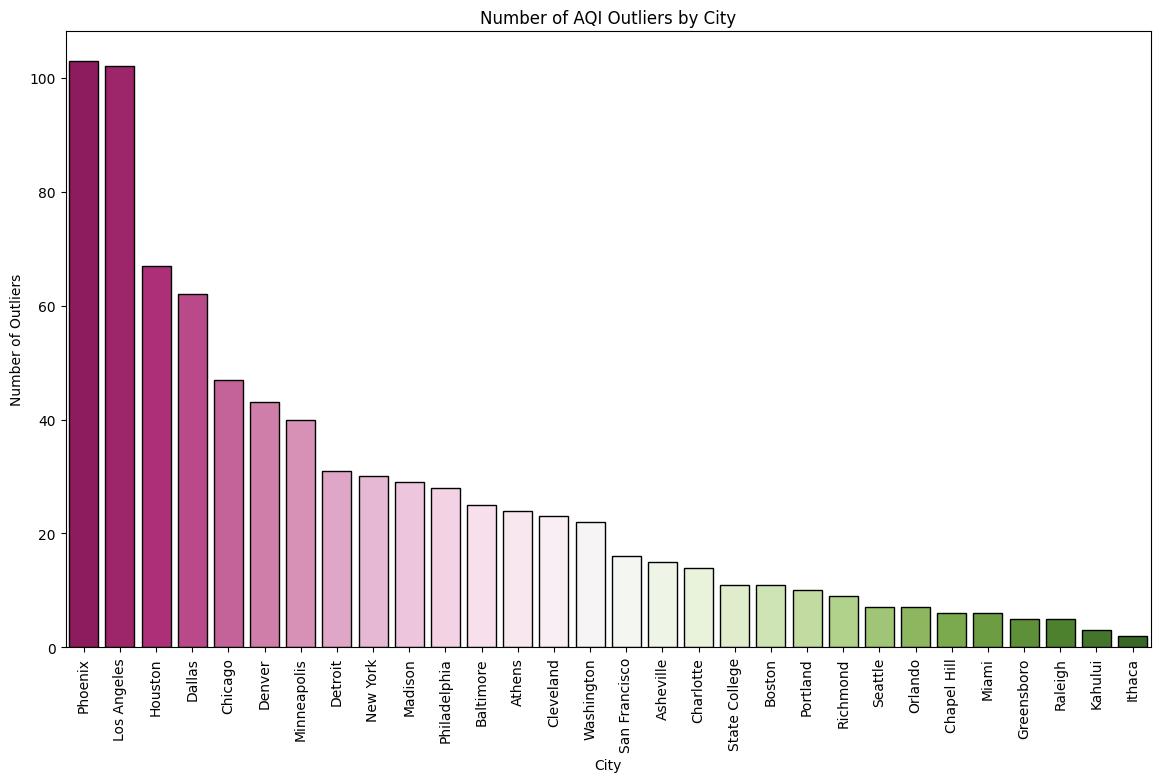

In [94]:
# Visualize outliers by city
plt.figure(figsize=(14, 8))
sns.barplot(x=outliers_by_city.index, y=outliers_by_city.values, palette="PiYG", edgecolor='black')
plt.title('Number of AQI Outliers by City')
plt.xlabel('City')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=90)
plt.show()

CONCLUSION :
- Phoenix and Los Angeles have most number of outliers present.
- After that Houstan And Dallas have most outliers.
- After that Chicago, Denver and Minneapolis have the most outliers.
- After that the number of outliers and steadily decreasing.
- The cities with least number of AQl outliers are Kahului and Ithaca.

In [96]:
# Count the number of outliers per state
outliers_by_state = outliers['state'].value_counts()

<ipython-input-98-7447d54ee2ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_by_state.index, y=outliers_by_state.values, palette="PuRd", edgecolor='black')


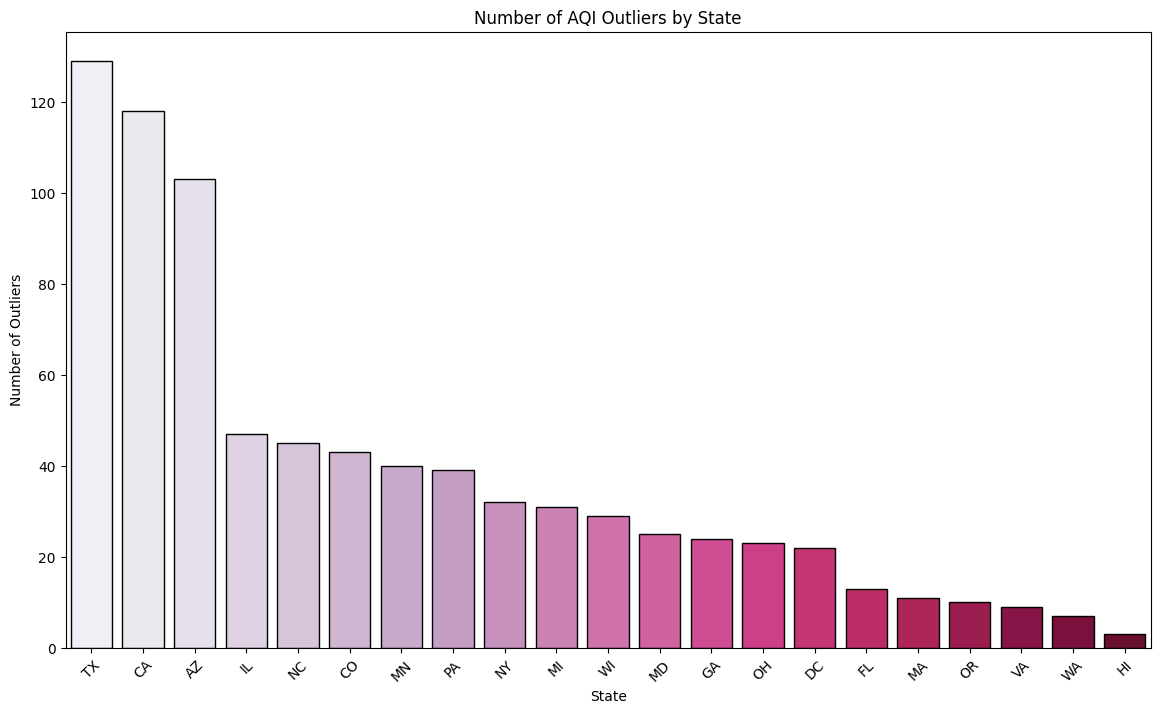

In [98]:
# Visualize outliers by state
plt.figure(figsize=(14, 8))
sns.barplot(x=outliers_by_state.index, y=outliers_by_state.values, palette="PuRd", edgecolor='black')
plt.title('Number of AQI Outliers by State')
plt.xlabel('State')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()


CONCLUSION :
- TX, CA and AZ are the states with most number of outliers present.
- After that IL, NC, CO, MIN and PA have most outliers.
- After that NY, MI, WI have the most outliers.
- After that the number of outliers are steadily decreasing.
- The states with least number of AQl outliers is HI.

# **END OF REPORT**